In [1]:
import sympy as sp
import numpy as np

def from_ham_symb(N):
    """Construct an MPO for a Hamiltonian with X and ZZ interactions

    This is an implementation using symbols to check correctness.

    Returns:
        MPO (List[array]): List of tensors representing the MPO (1 tensor for each qubit)
    """
    # Future work: Simplify MPOs if certain given coefficients are 0
    
    N_by_2 = int(N / 2)

    a_list = [np.zeros((k + 2, k + 3), dtype=object) for k in range(1, N_by_2)]

    aux = 2 if N % 2 == 0 else 3
    a_list += [np.zeros((N_by_2 + 2, N_by_2 + aux), dtype=object)]

    a_list += [np.zeros((N - k + 3, N - k + 2), dtype=object) for k in range(N_by_2 + 1, N + 1)]

    for k in range(1, N+1):
        a_list[k-1][0,0] = 1
        a_list[k-1][-1,-1] = 1
        a_list[k-1][-2,-1] = sp.Symbol(f'Z_{k}')
        a_list[k-1][0,-1] = sp.Symbol(f'X_{k}')*sp.Symbol(f'c_x{k}')
        
        if k < N_by_2:
            a_list[k-1][0,1] = sp.Symbol(f'Z_{k}')
            a_list[k-1][0,k+1] = sp.Symbol(f'Z_{k}')*sp.Symbol(f'c_{k},{k+1}')

            for m in range(2, k+1):
                a_list[k-1][m-1, m] = 1
                a_list[k-1][m-1, k+1] = sp.Symbol(f'c_{k-m+1},{k+1}')

        elif k == N_by_2:
            for n in range(2, N_by_2 + aux):
                a_list[k-1][0, n-1] = sp.Symbol(f'Z_{k}')*sp.Symbol(f'c_{N_by_2},{N-n+2}')
                for m in range(2, k+1):
                    a_list[k-1][m-1, n-1] = sp.Symbol(f'c_{N_by_2-m+1},{N-n+2}')

        else: # k+1 > N_by_2:
            for m in range(2, N-k+2):
                a_list[k-1][0, m-1] = sp.Symbol(f'Z_{k}')*sp.Symbol(f'c_{k},{N-m+2}')
                a_list[k-1][m-1, m-1] = 1

    a_list[0] = a_list[0][0, :] # other rows are used to propagate information of previous tensors, does not make sense to keep them
    a_list[-1] = a_list[-1][:, -1] # other columns are used to propagate information to the next tensors, does not make sense to keep them

    tn = a_list[0]
    
    for i in range(N - 1):
        tn = np.matmul(tn, a_list[i+1])

    return tn, a_list

In [2]:
N = 6

symb_ham, a_list = from_ham_symb(N)

symb_ham

X_1*c_x1 + X_2*c_x2 + X_3*c_x3 + X_4*c_x4 + X_5*c_x5 + X_6*c_x6 + Z_1*Z_2*c_1,2 + Z_3*(Z_1*c_1,3 + Z_2*c_2,3) + Z_4*(Z_1*c_1,4 + Z_2*c_2,4 + Z_3*c_3,4) + Z_5*(Z_1*c_1,5 + Z_2*c_2,5 + Z_3*c_3,5 + Z_4*c_4,5) + Z_6*(Z_1*c_1,6 + Z_2*c_2,6 + Z_3*c_3,6 + Z_4*c_4,6 + Z_5*c_5,6)

************************************
[1 Z_1 Z_1*c_1,2 X_1*c_x1]
************************************
0, 0 -> 1
0, 1 -> Z_2
0, 3 -> Z_2*c_2,3
0, 4 -> X_2*c_x2
1, 2 -> 1
1, 3 -> c_1,3
2, 4 -> Z_2
3, 4 -> 1


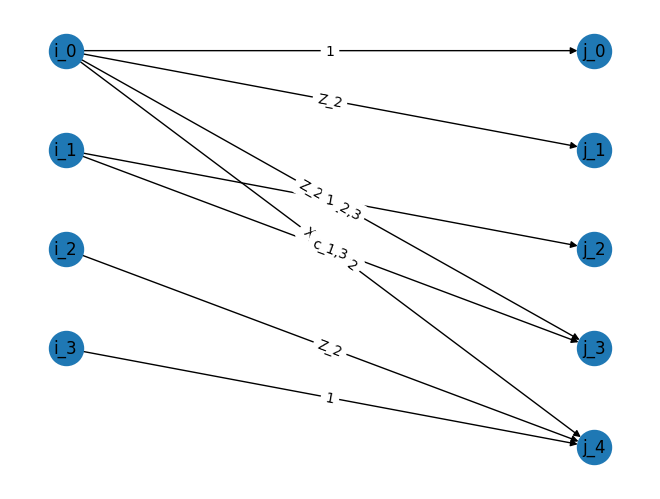

************************************
0, 0 -> 1
0, 1 -> Z_3*c_3,6
0, 2 -> Z_3*c_3,5
0, 3 -> Z_3*c_3,4
0, 4 -> X_3*c_x3
1, 1 -> c_2,6
1, 2 -> c_2,5
1, 3 -> c_2,4
2, 1 -> c_1,6
2, 2 -> c_1,5
2, 3 -> c_1,4
3, 4 -> Z_3
4, 4 -> 1


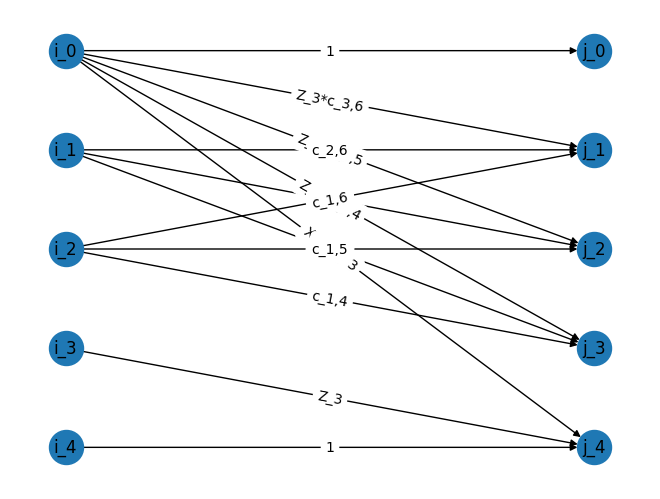

************************************
0, 0 -> 1
0, 1 -> Z_4*c_4,6
0, 2 -> Z_4*c_4,5
0, 3 -> X_4*c_x4
1, 1 -> 1
2, 2 -> 1
3, 3 -> Z_4
4, 3 -> 1


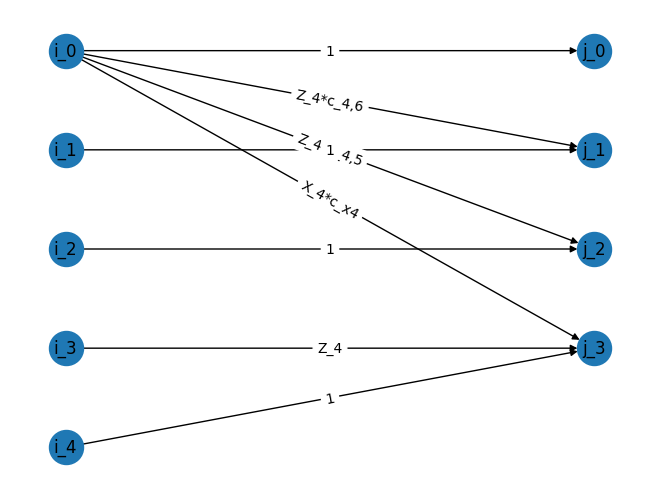

************************************
0, 0 -> 1
0, 1 -> Z_5*c_5,6
0, 2 -> X_5*c_x5
1, 1 -> 1
2, 2 -> Z_5
3, 2 -> 1


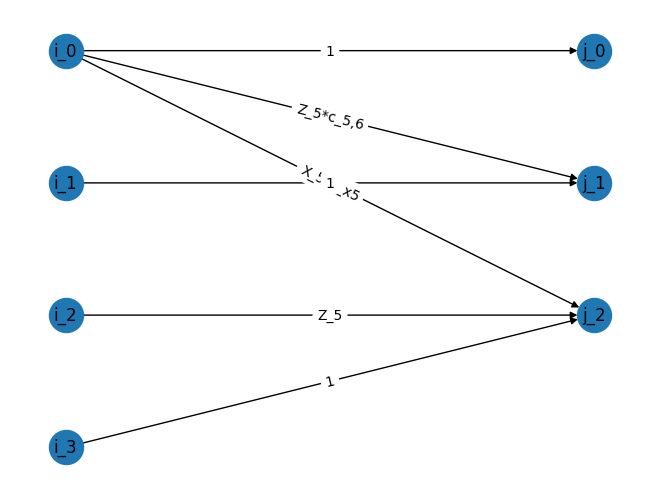

************************************
[X_6*c_x6 Z_6 1]


In [3]:
from tools import plot_diagram_from_matrix

print('************************************')
print(a_list[0])
print('************************************')

for i in range(1, len(a_list)-1):
    plot_diagram_from_matrix(a_list[i])

print(a_list[-1])